<a href="https://colab.research.google.com/github/shro-2002/shro_2002/blob/main/Random_Forest_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("qsar_androgen_receptor.csv", delimiter = ";", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,positive
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,negative
1683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1684,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
1685,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


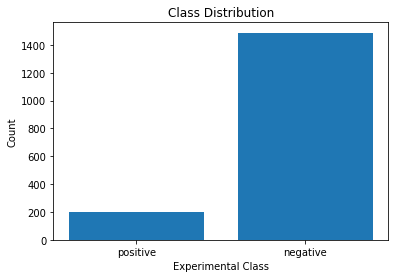

In [215]:
positives = sum(df[1024]=='positive')
negatives = sum(df[1024]=='negative')

# plot bar plot
plt.bar(['positive', 'negative'], [positives, negatives])
plt.xlabel('Experimental Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [216]:


# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the column of categorical data
df[1024] = le.fit_transform(df[1024])

df[1024]


0       1
1       1
2       1
3       1
4       1
       ..
1682    0
1683    0
1684    0
1685    0
1686    0
Name: 1024, Length: 1687, dtype: int64

In [217]:
# from imblearn.over_sampling import SMOTE

# # Separate input features and target
# X = df.drop(df.columns[1024], axis=1)
# y = df[1024]

# # Apply SMOTE
# smote = SMOTE()
# X,y = smote.fit_resample(X, y)


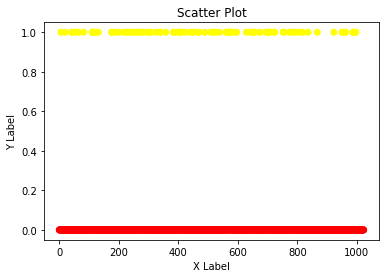

In [218]:


x1= [i for i in range(1024)] # x-coordinates
y1 = [df[i][1024] for i in range(1024)] # y-coordinates

colors = []
for j in y1:
  if j == 0:
    colors.append('red')
  else:
    colors.append('yellow')

plt.scatter(x1, y1,c=colors)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Scatter Plot')
plt.show()


In [219]:
from sklearn.model_selection import train_test_split

# feature and target variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.dtypes)



0       int64
1       int64
2       int64
3       int64
4       int64
        ...  
1019    int64
1020    int64
1021    int64
1022    int64
1023    int64
Length: 1024, dtype: object


In [220]:


# create a FactorAnalysis object with the number of components you want to extract
n_components = 3
fa = FactorAnalysis(n_components=n_components, rotation="varimax")

# fit the model to your binary data
fa.fit(X)

# transform your data using the fitted model
X_transformed = fa.transform(X)
X=X_transformed

print(X.shape)

(1687, 3)


In [221]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [222]:


# apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

Accuracy: 71.01%
Accuracy: 67.46%
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       300
           1       0.23      0.68      0.35        38

    accuracy                           0.71       338
   macro avg       0.59      0.70      0.58       338
weighted avg       0.87      0.71      0.76       338

              precision    recall  f1-score   support

           0       0.94      0.67      0.79       300
           1       0.21      0.68      0.32        38

    accuracy                           0.67       338
   macro avg       0.58      0.68      0.55       338
weighted avg       0.86      0.67      0.73       338

Cross-entropy Loss: 10.450526722288405
Cross-entropy Loss: 11.730183055629842


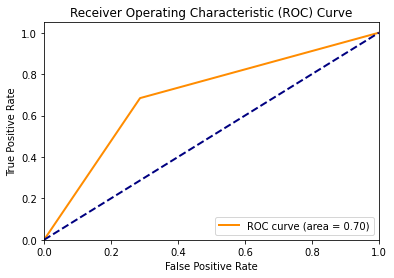

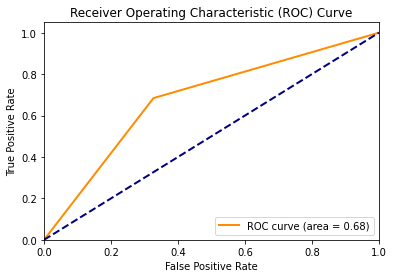

In [223]:
knn = KNeighborsClassifier(n_neighbors=11)
knn1 = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train1, y_train1)
knn1.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
knn_pred = knn.predict(X_test)
knn_pred1 = knn1.predict(X_test)

#calculate the accuracy score for SMOTE
acc = accuracy_score(y_test, knn_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

#calculate the accuracy score for ADASYN
acc = accuracy_score(y_test, knn_pred1)
print("Accuracy: {:.2f}%".format(acc * 100))


print(classification_report(y_test, knn_pred))
print(classification_report(y_test, knn_pred1))

loss = log_loss(y_test, knn_pred)
print("Cross-entropy Loss:", loss)


loss = log_loss(y_test, knn_pred1)
print("Cross-entropy Loss:", loss)

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, knn_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


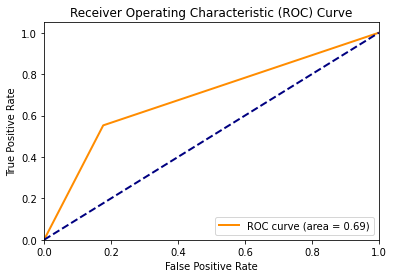

In [224]:
xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train1, y_train1)
xgb_pred = xgb_model.predict(X_test)



xgb_model1 = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1)

xgb_model1.fit(X_train_resampled, y_train_resampled)
xgb_pred1 = xgb_model1.predict(X_test)




# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




Accuracy: 79.29%
Accuracy: 77.51%
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       300
           1       0.28      0.55      0.38        38

    accuracy                           0.79       338
   macro avg       0.61      0.69      0.63       338
weighted avg       0.86      0.79      0.82       338

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       300
           1       0.28      0.63      0.39        38

    accuracy                           0.78       338
   macro avg       0.61      0.71      0.62       338
weighted avg       0.87      0.78      0.81       338



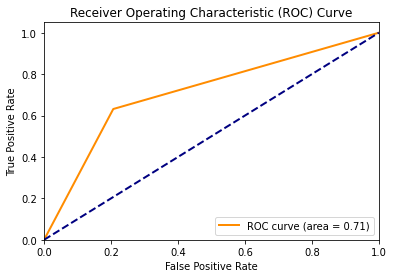

Cross-entropy Loss: 7.464661944491719
Cross-entropy Loss: 8.104490111162436


In [225]:

#calculate the accuracy score for SMOTE
acc = accuracy_score(y_test, xgb_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

#calculate the accuracy score for ADASYN
acc = accuracy_score(y_test, xgb_pred1)
print("Accuracy: {:.2f}%".format(acc * 100))


print(classification_report(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred1))


from sklearn.metrics import roc_curve, auc


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

loss = log_loss(y_test, xgb_pred)
print("Cross-entropy Loss:", loss)

loss = log_loss(y_test, xgb_pred1)
print("Cross-entropy Loss:", loss)

Accuracy: 72.49%
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       300
           1       0.26      0.79      0.39        38

    accuracy                           0.72       338
   macro avg       0.61      0.75      0.61       338
weighted avg       0.89      0.72      0.77       338



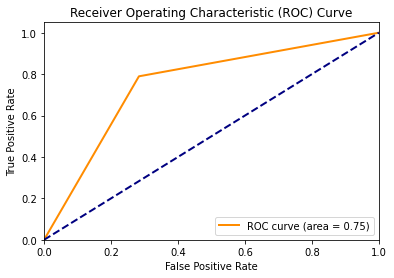

Accuracy: 69.53%
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       300
           1       0.24      0.79      0.37        38

    accuracy                           0.70       338
   macro avg       0.60      0.74      0.58       338
weighted avg       0.88      0.70      0.75       338



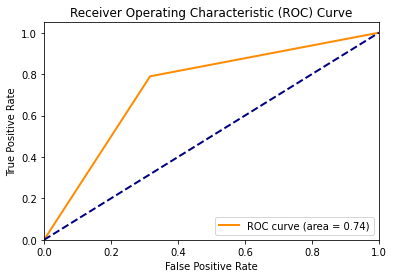

Cross-entropy Loss: 9.917336583396139
Cross-entropy Loss: 10.983716861180671


In [226]:
# create a RandomForestClassifier object with desired hyperparameters
rf_model = RandomForestClassifier(n_estimators=500, max_depth=3)
# fit the model to the training data
rf_model.fit(X_train1, y_train1)

rf_pred = rf_model.predict(X_test)

acc2 = accuracy_score(y_test, rf_pred)
print("Accuracy: {:.2f}%".format(acc2 * 100))

print(classification_report(y_test, rf_pred))
from sklearn.metrics import roc_curve, auc


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


rf_model1 = RandomForestClassifier(n_estimators=500, max_depth=3)

rf_model1.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
rf_pred1 = rf_model1.predict(X_test)

#calculate the accuracy score
acc2 = accuracy_score(y_test, rf_pred1)
print("Accuracy: {:.2f}%".format(acc2 * 100))

print(classification_report(y_test, rf_pred1))


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, rf_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

loss = log_loss(y_test, rf_pred)
print("Cross-entropy Loss:", loss)

loss = log_loss(y_test, rf_pred1)
print("Cross-entropy Loss:", loss)
